In [56]:
import time
import random
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [7]:
# pip install chardet


     -------------------------------------- 199.4/199.4 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# import chardet
# import pandas as pd

# # Detect the encoding
# with open('dummy_dataset_1.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(10000))  # Read the first 10,000 bytes
#     encoding = result['encoding']

# # Load the file using the detected encoding
# df = pd.read_csv('dummy_dataset_1.csv', encoding=encoding)

In [75]:
product=pd.read_csv("product_data.csv",header=None,encoding='latin-1')

In [77]:
product.head()

,product_id,product_description,product_group
0,000052,PUNCH II MSW1 1500mm PUN,35_Leuchten
1,1036628,H05VV-F2X1 5WS 50M,16_Sonderverkäufe
2,1052053,H07RN-F3G1 100M,16_Sonderverkäufe
3,110109,SIEM DELTA Doppelta 2S 5TD2111,32_Schalter_Steckvorrichtg
4,110125,SIEM PLUS Wip Univ ews 5TG7581,32_Schalter_Steckvorrichtg


In [82]:
len(product)

2199593

In [76]:
product.columns=["product_id","product_description","product_group"]

In [78]:
product.describe()

,product_id,product_description,product_group
count,2199593,2193570,2199593
unique,2199593,1422888,18
top,000052,Klemmenmarkierung,33_Schaltgeräte
freq,1,11251,557163


In [60]:
product.dtypes

product_id             object
product_description    object
product_group          object
dtype: object

In [79]:
product.isna().sum()

product_id                0
product_description    6023
product_group             0
dtype: int64

In [66]:
missing_product_description = product[product['product_description'].isna()]
missing_product_description.describe()
missing_product_description.groupby(["product_group"]).count()


,product_id,product_description
product_group,,
16_Sonderverkäufe,2,0
18_Haustechnik_Hausgeräte,4,0
19_Werkzeug,9,0
31_Install.-Befestigungs-Mat.,2880,0
32_Schalter_Steckvorrichtg,6,0
33_Schaltgeräte,1237,0
34_Verteiler_Schränke,41,0
35_Leuchten,76,0
36_Entladungs-Leuchten,502,0


In [42]:
# product= pd.read_csv("product_name.csv",header=None,encoding='latin-1')
# product.columns=["product_id","product_desc","product_group"]
# product.isna().sum()

product_id          0
product_desc     6023
product_group       0
dtype: int64

In [35]:
df_nan = product.replace({np.nan: None})

In [67]:
df_nan.head()

,product_id,product_desc,product_group,product_group_id,product_group_description
0,000052,PUNCH II MSW1 1500mm PUN,35_Leuchten,35,Leuchten
1,1036628,H05VV-F2X1 5WS 50M,16_Sonderverkäufe,16,Sonderverkäufe
2,1052053,H07RN-F3G1 100M,16_Sonderverkäufe,16,Sonderverkäufe
3,110109,SIEM DELTA Doppelta 2S 5TD2111,32_Schalter_Steckvorrichtg,32,Schalter_Steckvorrichtg
4,110125,SIEM PLUS Wip Univ ews 5TG7581,32_Schalter_Steckvorrichtg,32,Schalter_Steckvorrichtg


In [81]:
len(product[~product.isna()]), len(product[product.isna()])

(2199593, 2199593)

In [85]:
product[product["product_description"].isna()]

,product_id,product_description,product_group
9328,256092,NaN,31_Install.-Befestigungs-Mat.
13246,363612,NaN,37_Leuchtmittel
14712,1849999,NaN,42_Netzwerktechnik
16676,470240,NaN,18_Haustechnik_Hausgeräte
19138,470239,NaN,18_Haustechnik_Hausgeräte
...,...,...,...
1999494,Z02686,NaN,42_Netzwerktechnik
2001975,Z02687,NaN,42_Netzwerktechnik
2014789,Z02685,NaN,42_Netzwerktechnik
2021922,Z02688,NaN,42_Netzwerktechnik


In [74]:
product[product.isna()]

,product_id,product_description,product_group
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2199588,NaN,NaN,NaN
2199589,NaN,NaN,NaN
2199590,NaN,NaN,NaN
2199591,NaN,NaN,NaN


In [ ]:
product.iloc

,product_id,product_description,product_group


In [36]:
df_nan_only = df_nan[df_nan['product_desc'].isna()]

In [35]:
#product["product_desc"] = product["product_desc"].replace({np.nan: None})


In [37]:
df_nan_only = product[product['product_desc'].isna()]

In [40]:
df_nan_only

,product_id,product_desc,product_group


In [41]:
df_nan["product_desc"].isna().sum()

0

In [ ]:
#product["product_desc"].isna()

In [42]:
product.describe()

,product_id,product_desc,product_group
count,2193570,2193570,2193570
unique,2193570,1422888,18
top,000052,Klemmenmarkierung,33_Schaltgeräte
freq,1,11251,555926


In [43]:
df_nan.groupby(["product_group"]).count()

,product_id,product_desc
product_group,,
16_Sonderverkäufe,5770,5770
18_Haustechnik_Hausgeräte,38955,38955
19_Werkzeug,79210,79210
2000_Alka_Bürobedarf,78177,78177
20_C-Artikel,279,279
31_Install.-Befestigungs-Mat.,334304,334304
32_Schalter_Steckvorrichtg,105501,105501
33_Schaltgeräte,555926,555926
34_Verteiler_Schränke,189307,189307


#### Separating product_group column into two separate columns. Newly split columns will be named "product_group_number" and "product group description"

In [44]:
df_nan[['product_group_id', 'product_group_description']] = df_nan["product_group"].str.split('_', n=1, expand=True)


In [45]:
df_nan

,product_id,product_desc,product_group,product_group_id,product_group_description
0,000052,PUNCH II MSW1 1500mm PUN,35_Leuchten,35,Leuchten
1,1036628,H05VV-F2X1 5WS 50M,16_Sonderverkäufe,16,Sonderverkäufe
2,1052053,H07RN-F3G1 100M,16_Sonderverkäufe,16,Sonderverkäufe
3,110109,SIEM DELTA Doppelta 2S 5TD2111,32_Schalter_Steckvorrichtg,32,Schalter_Steckvorrichtg
4,110125,SIEM PLUS Wip Univ ews 5TG7581,32_Schalter_Steckvorrichtg,32,Schalter_Steckvorrichtg
...,...,...,...,...,...
2199588,Z53390,ASJ MD300EB NH-Lasttrennlei,34_Verteiler_Schränke,34,Verteiler_Schränke
2199589,Z53392,ASJ MD31B NH-Lasttrennleist,34_Verteiler_Schränke,34,Verteiler_Schränke
2199590,Z53394,ASJ MD31HB NH-Lasttrennleis,34_Verteiler_Schränke,34,Verteiler_Schränke
2199591,Z50507,ABB LLEG124X560MM24 LED LLEG1,37_Leuchtmittel,37,Leuchtmittel


In [46]:
df_nan.drop(columns=["product_group"])

,product_id,product_desc,product_group_id,product_group_description
0,000052,PUNCH II MSW1 1500mm PUN,35,Leuchten
1,1036628,H05VV-F2X1 5WS 50M,16,Sonderverkäufe
2,1052053,H07RN-F3G1 100M,16,Sonderverkäufe
3,110109,SIEM DELTA Doppelta 2S 5TD2111,32,Schalter_Steckvorrichtg
4,110125,SIEM PLUS Wip Univ ews 5TG7581,32,Schalter_Steckvorrichtg
...,...,...,...,...
2199588,Z53390,ASJ MD300EB NH-Lasttrennlei,34,Verteiler_Schränke
2199589,Z53392,ASJ MD31B NH-Lasttrennleist,34,Verteiler_Schränke
2199590,Z53394,ASJ MD31HB NH-Lasttrennleis,34,Verteiler_Schränke
2199591,Z50507,ABB LLEG124X560MM24 LED LLEG1,37,Leuchtmittel


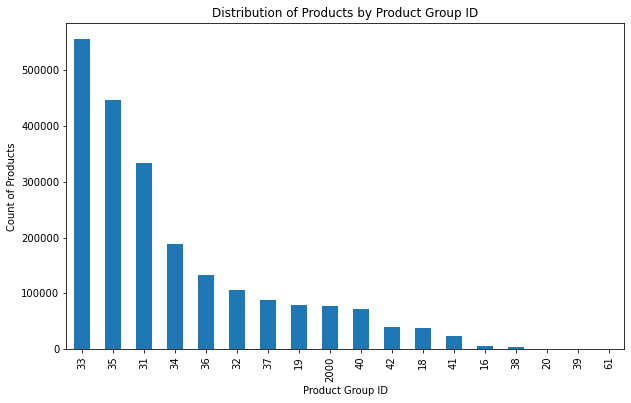

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_nan['product_group_id'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Products by Product Group ID')
plt.xlabel('Product Group ID')
plt.ylabel('Count of Products')
plt.show()


In [48]:
import seaborn as sns

sns.boxplot(data=df_nan, x='product_group_id')
plt.title('Box Plot of Product Group ID')
plt.show()


TypeError: Horizontal orientation requires numeric `x` variable.

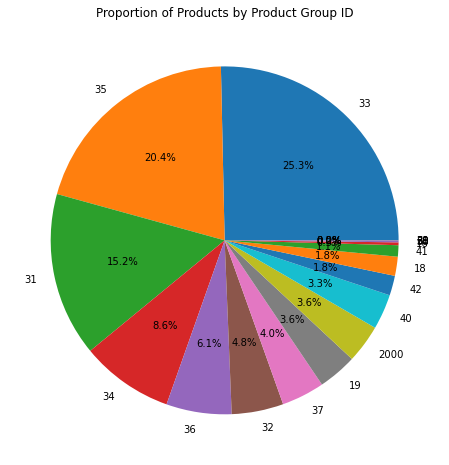

In [49]:
df_nan['product_group_id'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Proportion of Products by Product Group ID')
plt.ylabel('')  # Hide y-axis label
plt.show()


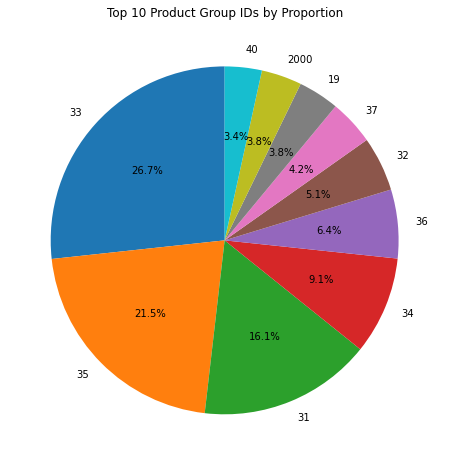

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Get the top 10 most frequent product_group_id
top_10_groups = df_nan['product_group_id'].value_counts().nlargest(10)

# Create a pie chart for the top 10 product_group_id
top_10_groups.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)

# Customize the pie chart
plt.title('Top 10 Product Group IDs by Proportion')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [91]:
product.to_csv("updated product.csv")

In [68]:
df_nan.to_csv("updated_24_OCT.csv")